In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime
from textblob import TextBlob
%matplotlib inline

In [2]:
#---Connecting to the twitter API---

consumer_key = 'MaGg73QHpakpAwbZKakc9IHAA'
consumer_secret = 'AT5zdfYRYcR5IF8380M86uCNvfJRwz8crnVdToR3ietczZXUFX'
access_token = '309523673-lfo0J5QhqMcF4l0LHbqBPZsOB1Zn29NWTqmWmXOj'
access_token_secret = '9wsIoZLkWOqJ6pNeabkzoHLjdHothFgzX9GiewN2hSEQn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

print(api.verify_credentials())

User(_api=<tweepy.api.API object at 0x000000000C906BE0>, _json={'id': 309523673, 'id_str': '309523673', 'name': 'Manish Ralli', 'screen_name': 'ManishRalli', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Thu Jun 02 07:07:17 +0000 2011', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/262714905/hitman.2a.jpg', 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/262714905/hitman.2a.jpg', 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'pr

In [9]:
#---Connecting to a MongoDB client---

col = pymongo.MongoClient()['Tweets']['Streaming']
col.remove()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


{'n': 100, 'ok': 1.0}

In [10]:
col.count()

0

In [11]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=1000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=100)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [12]:
#---Connect to Streaming API---

keywords = ["#Manmohansingh"]
# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

Finished
Total Mining Time: 0:02:59.714279
Tweets/Sec: 0.6
Tweets collected: 100
Total tweets in collection: 100


In [13]:
#---Data Analysis---

col.find_one()

{'_id': ObjectId('59ca2fdb6b6aae08ac96dca7'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Sep 26 10:45:47 +0000 2017',
 'entities': {'hashtags': [{'indices': [19, 33], 'text': 'Manmohansingh'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 912629267401281538,
 'id_str': '912629267401281538',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'quote_count': 0,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'text': "Happy Birthday Dr. #Manmohansingh. It is after your tenure that we realised ur efforts. Sadly you didn't get the right ppl sorrounding u :(",
 'timestamp_ms': '1506422747837',

In [15]:
#---Load Results in a DataFrame---

dataset = [{"Created_at": item["created_at"],
            "Text": item["text"],
            "User": "@%s" % item["user"]["screen_name"],
            "Source": item["source"],
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset.head(100)

,Created_at,Source,Text,User
0,Tue Sep 26 10:45:47 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",Happy Birthday Dr. #Manmohansingh. It is after...,@neel_bhave
1,Tue Sep 26 10:45:48 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @kohliakanshaa: अब ये अफ़वाह कौन फैला रहा ह...,@ShobhitVishwak6
2,Tue Sep 26 10:45:49 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @iesske: @kriratna @MadanMohanJha56 @Office...,@kriratna
3,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @SirJadeja: Wishing A Very Happy B'day To E...,@cricket_premi
4,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @ShirishKunder: Not only his prediction on ...,@farhatarif
5,Tue Sep 26 10:45:51 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @iAbhishek_J: Can't ignore the contribution...,@pankajsuper30
6,Tue Sep 26 10:45:52 +0000 2017,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @sanjayuvacha: A Very Happy Birthday to Dr ...,@Forgoten_Indian
7,Tue Sep 26 10:45:53 +0000 2017,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PradeepINDIAN0: I nvr anything shared by #...,@ReenaSi49328703
8,Tue Sep 26 10:45:54 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @ankit_bcet: .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,@iempress_1
9,Tue Sep 26 10:45:53 +0000 2017,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Happy birthday Dr. #ManmohanSingh. https://t.c...,@DailySocial7


In [16]:
#---Checking the highest used words---

cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.Text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50].head(8)

,word,count
0,rt,85
1,manmohansingh,73
2,to,37
3,happy,35
4,birthday,25
5,the,23
6,https,20
7,very,19


In [17]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""

Hootsuite                     1
Twitter for Windows Phone     1
Twitter for Windows           1
Twitter Web Client            9
Twitter Lite                  9
Twitter for iPhone           13
Twitter for Android          66
Name: Source, dtype: int64

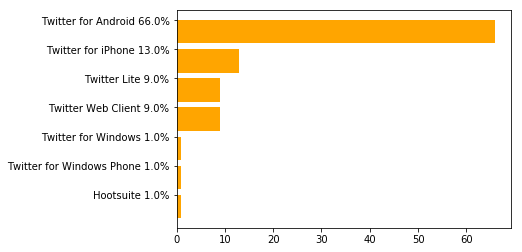

In [18]:
dataset.source_name = dataset.Source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="orange", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

In [19]:
def calc_polarity(i):
    tweet = TextBlob(dataset['Text'][i])
    return tweet.polarity

dataset['Tweet_Polarity'] = [calc_polarity(i) for i in range(len(dataset))]

In [20]:
def calc_sub(i):
    tweet = TextBlob(dataset['Text'][i])
    return tweet.subjectivity

dataset['Tweet_Subjectivity'] = [calc_sub(i) for i in range(len(dataset))]

In [21]:
dataset.head()

,Created_at,Source,Text,User,Tweet_Polarity,Tweet_Subjectivity
0,Tue Sep 26 10:45:47 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",Happy Birthday Dr. #Manmohansingh. It is after...,@neel_bhave,-0.041071,0.883929
1,Tue Sep 26 10:45:48 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @kohliakanshaa: अब ये अफ़वाह कौन फैला रहा ह...,@ShobhitVishwak6,0.000000,0.000000
2,Tue Sep 26 10:45:49 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @iesske: @kriratna @MadanMohanJha56 @Office...,@kriratna,0.000000,0.000000
3,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @SirJadeja: Wishing A Very Happy B'day To E...,@cricket_premi,0.266667,0.633333
4,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @ShirishKunder: Not only his prediction on ...,@farhatarif,0.175000,0.825000


In [28]:
dataset.drop('Sent_Polarity',axis =1,inplace = True)

In [22]:
dataset.head(20)

,Created_at,Source,Text,User,Tweet_Polarity,Tweet_Subjectivity
0,Tue Sep 26 10:45:47 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",Happy Birthday Dr. #Manmohansingh. It is after...,@neel_bhave,-0.041071,0.883929
1,Tue Sep 26 10:45:48 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @kohliakanshaa: अब ये अफ़वाह कौन फैला रहा ह...,@ShobhitVishwak6,0.000000,0.000000
2,Tue Sep 26 10:45:49 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @iesske: @kriratna @MadanMohanJha56 @Office...,@kriratna,0.000000,0.000000
3,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @SirJadeja: Wishing A Very Happy B'day To E...,@cricket_premi,0.266667,0.633333
4,Tue Sep 26 10:45:50 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @ShirishKunder: Not only his prediction on ...,@farhatarif,0.175000,0.825000
5,Tue Sep 26 10:45:51 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @iAbhishek_J: Can't ignore the contribution...,@pankajsuper30,0.000000,0.000000
6,Tue Sep 26 10:45:52 +0000 2017,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @sanjayuvacha: A Very Happy Birthday to Dr ...,@Forgoten_Indian,0.500000,0.666667
7,Tue Sep 26 10:45:53 +0000 2017,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @PradeepINDIAN0: I nvr anything shared by #...,@ReenaSi49328703,0.000000,0.050000
8,Tue Sep 26 10:45:54 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",RT @ankit_bcet: .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,@iempress_1,0.500000,0.550000
9,Tue Sep 26 10:45:53 +0000 2017,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Happy birthday Dr. #ManmohanSingh. https://t.c...,@DailySocial7,0.800000,1.000000
